In [ ]:
import os

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

In [88]:
data_dir = "./titanic"
data_path = os.path.join(data_dir, "train.csv")

dataframe = pd.read_csv(data_path)
print(dataframe.shape)
dataframe.head(20)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [89]:
# checking null data
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
# taking median of age and put it into NaN ages
dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)

# Embarked doesn`t count for propability becuase person is on the ship
dataframe.drop(columns=['Embarked', 'PassengerId', 'Name', 'Ticket'], inplace=True)
dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


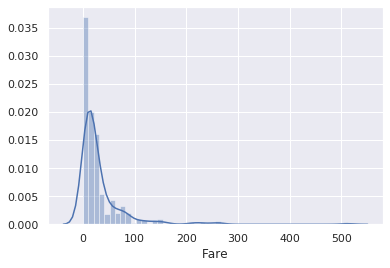

In [111]:
sns.set()
sns.distplot(dataframe['Fare'])

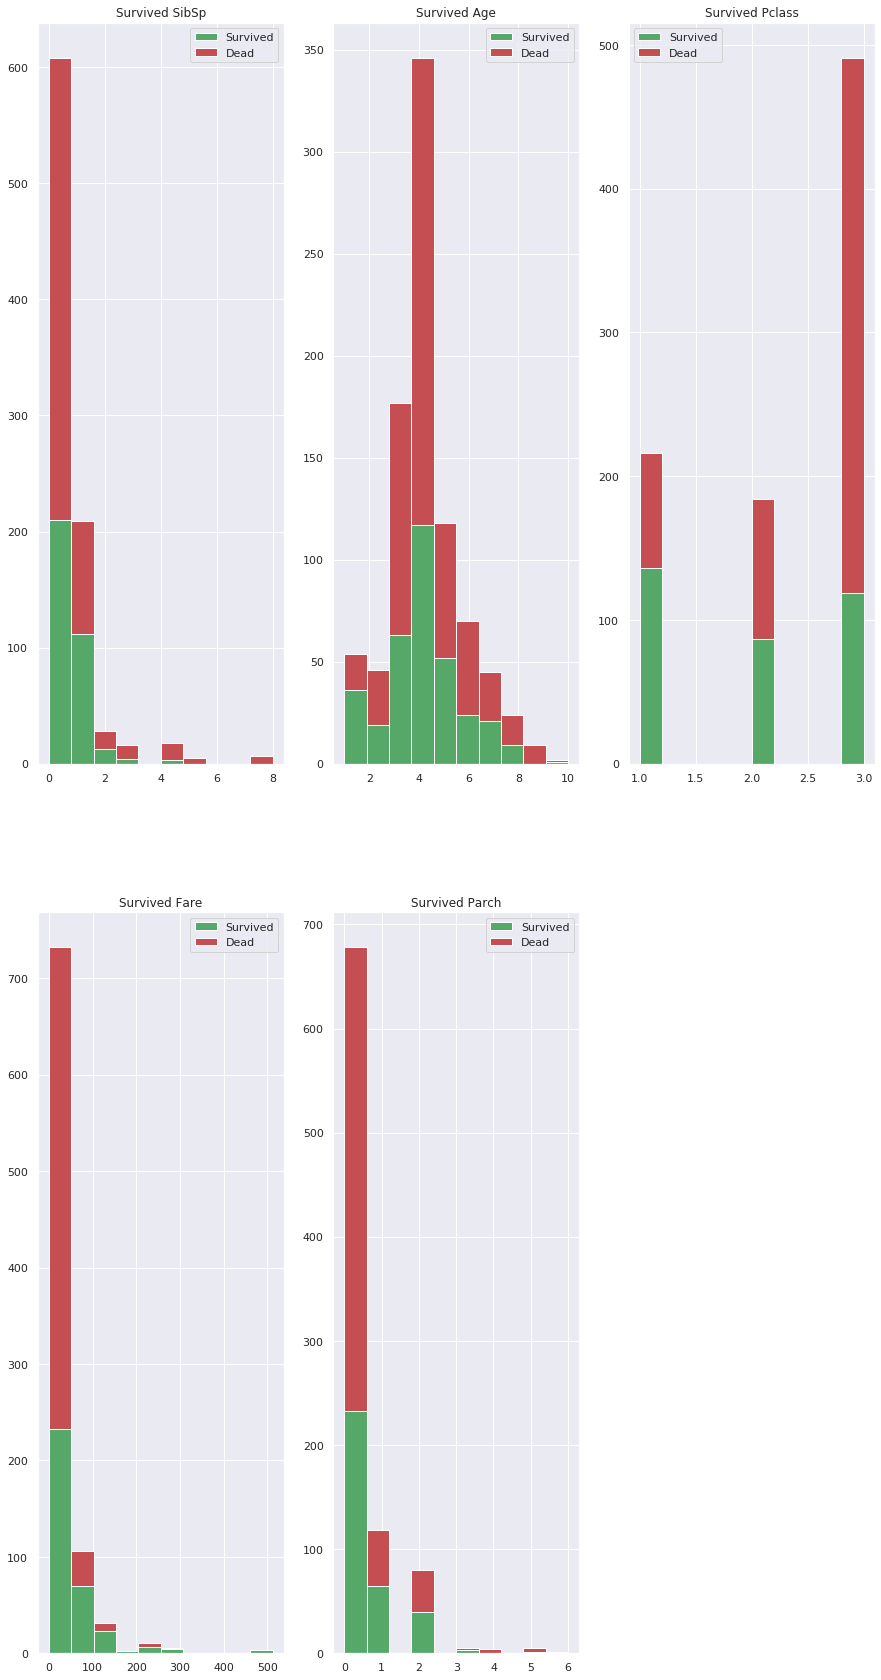

In [112]:
plt.figure(figsize=(15,30))
plt.subplot(231)
plt.hist(x = [dataframe[dataframe['Survived']==1]['SibSp'], dataframe[dataframe['Survived']==0]['SibSp']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title("Survived SibSp")
plt.legend()

plt.subplot(232)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Age'], dataframe[dataframe['Survived']==0]['Age']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Age")
plt.legend()

plt.subplot(233)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Pclass'], dataframe[dataframe['Survived']==0]['Pclass']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Pclass")
plt.legend()

plt.subplot(234)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Fare'], dataframe[dataframe['Survived']==0]['Fare']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Fare")
plt.legend()

plt.subplot(235)
plt.hist(x = [dataframe[dataframe['Survived']==1]['Parch'], dataframe[dataframe['Survived']==0]['Parch']],
        stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title("Survived Parch")
plt.legend()

In [113]:
print(dataframe['Age'].max())
dataframe['Age'] = pd.cut(dataframe['Age'], bins=10, labels=(1,2,3,4,5,6,7,8,9,10))

10


In [114]:
for x in dataframe:
    if x == 'Survived' or dataframe[x].dtype == 'object':
        continue
    print("Survival chance by: ", x, " ", dataframe[x].dtype)
    print(dataframe[[x, 'Survived']].groupby(x, as_index=True).mean().sort_values(by='Survived', ascending=False))
    

Survival chance by:  Pclass   int64
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
Survival chance by:  Age   category
     Survived
Age          
1    0.666667
10   0.500000
7    0.466667
5    0.440678
2    0.413043
8    0.375000
3    0.355932
6    0.342857
4    0.338150
9    0.000000
Survival chance by:  SibSp   int64
       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000
Survival chance by:  Parch   int64
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000
Survival chance by:  Fare   float64
          Survived
Fare              
512.3292       1.0
57.9792        1.0
13.8583        1.0
13.7917        1.0
13.4167        1.0
12.6500        1.0
12.4750        1.0
12.2875        1.0
56.9292        1.0
12.0000        1.0
57.0000        1.0
11.1333        1.0
59.4000        

In [96]:
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,3,1,0,7.2500,NaN
1,1,1,female,5,1,0,71.2833,C85
2,1,3,female,4,0,0,7.9250,NaN
3,1,1,female,5,1,0,53.1000,C123
4,0,3,male,5,0,0,8.0500,NaN


In [115]:
dataframe['Travel Alone']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         